# Assignment lab 02
- 22.03.19

## Master Class: Machine Learning (5MI2018)
- Faculty of Economic Science
- University of Neuchatel (Switzerland)
- Lab 1, see ML21_Exercise_1.pdf for more information

## Authors: 
- Romain Claret @RomainClaret
- Sylvain Robert-Nicoud @Nic0uds

In [1]:
# get the features names and the values of the categories from adult.names (features and values linked by the index)

data_dict = {}
with open('adult.names') as f:
    for l in f:
        if l[0] == '|' or ':' not in l: continue
        c = l.split(':')
        if c[1].startswith(' continuous'): data_dict[c[0]] = ""
        else: data_dict[c[0]] = c[1].replace("\n","").replace(".","").replace(" ","").split(",")

In [2]:
# in the specifications (adult.names): Unknown values are replaced with the character '?'

import pandas as pd

header = list(data_dict.keys())+['income']
df_train = pd.read_table("adult.data", sep=r',\s', na_values='?', header=None, names=header).dropna()
df_evaluate = pd.read_table("adult.test", sep=r',\s', na_values='?', skiprows=[0], header=None, names=header).dropna()

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
for c in df_train:
    print(c, df_train[c].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
fnlwgt [ 77516  83311 215646 ...  84661 257302 201490]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-

In [5]:
# Standardizing of numeric values
# Doesn't have a lot of meaning in the case of decision trees as it's not using distances (like KNN)
# But it's just a pedagological flavor
# https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

#for c in df_train.select_dtypes(exclude=['object']):
#    df_train["stand_"+c] = df_train[c] - (df_train[c].mean() / df_train[c].std())
#    
#for c in df_evaluate.select_dtypes(exclude=['object']):
#    df_evaluate["stand_"+c] = df_evaluate[c] - (df_evaluate[c].mean() / df_evaluate[c].std())
#
#df_train.info(verbose=True)

In [6]:
# droping the education because it's redundant with education-num
# droping the occupation because it's not generic enough, we have much more categories that those captured in the training sample
# droping the relationship because it's not generic enough, we have much more categories that those captured in the training sample

drop_list = ["education", "occupation", "relationship"]
df_train = df_train.drop(columns=drop_list)
df_evaluate = df_evaluate.drop(columns=drop_list)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   race            30162 non-null  object
 6   sex             30162 non-null  object
 7   capital-gain    30162 non-null  int64 
 8   capital-loss    30162 non-null  int64 
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  income          30162 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [8]:
# reducing categories with multiple options into lower dimensions classification (into binary preferably) when possible
# - marital-status could be reduced as Married or Not-Married
# marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Separated' 'Married-AF-spouse' 'Widowed']
# - workclass could be recuded to 3 dimensions: Government, Private, and Self-Employment
# Note that we take into consideration all the options for the category from the specifications
# ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' 'Self-emp-inc' 'Without-pay']

dict_replace = {
    'marital-status' : {
        'Never-married': 'Not-Married',
        'Married-civ-spouse': 'Married',
        'Divorced': 'Not-Married',
        'Married-spouse-absent': 'Married',
        'Separated': 'Married',
        'Married-AF-spouse': 'Married',
        'Widowed': 'Not-Married'
        },
    'workclass': {
        'State-gov': 'Government',
        'Self-emp-not-inc': 'Self-Employment',
        'Federal-gov': 'Government',
        'Local-gov': 'Government',
        'Self-emp-inc': 'Self-Employment'
        }
}

df_train.replace(dict_replace, inplace=True)
df_evaluate.replace(dict_replace, inplace=True)

In [9]:
# uniformizing the categories between the training and evaluation datasets
# indeed, there is a . at the end of the value in the evaluation dataset for the income category and not in the training dataset
df_evaluate["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

In [10]:
df_evaluate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education-num   15060 non-null  int64 
 4   marital-status  15060 non-null  object
 5   race            15060 non-null  object
 6   sex             15060 non-null  object
 7   capital-gain    15060 non-null  int64 
 8   capital-loss    15060 non-null  int64 
 9   hours-per-week  15060 non-null  int64 
 10  native-country  15060 non-null  object
 11  income          15060 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.5+ MB


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   race            30162 non-null  object
 6   sex             30162 non-null  object
 7   capital-gain    30162 non-null  int64 
 8   capital-loss    30162 non-null  int64 
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  income          30162 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [12]:
from sklearn.preprocessing import LabelEncoder
# for binary categories we will be using a label encoder
# - marital-status, sex, income

for l in ["marital-status", "sex", "income"]:
    l_enc = LabelEncoder()
    encoder_train = l_enc.fit(df_train[l])
    encoder_evaluate = l_enc.fit(df_evaluate[l])
    df_train["encoded_"+l] = encoder_train.transform(df_train[l])
    df_evaluate["encoded_"+l] = encoder_evaluate.transform(df_evaluate[l])
    
#df_train.reset_index(inplace=True,drop=True)
#df_evaluate.reset_index(inplace=True,drop=True)

In [13]:
for c in df_evaluate:
    print(c, df_evaluate[c].unique())

age [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]
workclass ['Private' 'Government' 'Self-Employment' 'Without-pay']
fnlwgt [226802  89814 336951 ... 350977 349230  83891]
education-num [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
marital-status ['Not-Married' 'Married']
race ['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
sex ['Male' 'Female']
capital-gain [    0  7688  3103  6418  7298  3908 14084  5178 15024  2597  2907  4650
  6497  5013 27828  4934  4064  3674  2174 10605 99999  1055   114  2580
  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471 10566
  2354  1424  1455  3325  4416 25236  4787  2829  4865  1264  1506   594
 10520  3464 20051  4101  1797  2407  3471  2653  1086  1848 14344  1151
  2993  2290 15020  9386  2202  3818  2176  5455  3418 11678  7978  7262

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30162 non-null  int64 
 1   workclass               30162 non-null  object
 2   fnlwgt                  30162 non-null  int64 
 3   education-num           30162 non-null  int64 
 4   marital-status          30162 non-null  object
 5   race                    30162 non-null  object
 6   sex                     30162 non-null  object
 7   capital-gain            30162 non-null  int64 
 8   capital-loss            30162 non-null  int64 
 9   hours-per-week          30162 non-null  int64 
 10  native-country          30162 non-null  object
 11  income                  30162 non-null  object
 12  encoded_marital-status  30162 non-null  int64 
 13  encoded_sex             30162 non-null  int64 
 14  encoded_income          30162 non-null  int64 
dtypes:

In [15]:
# For non-binary categories, first we check the specifications of the dataset to validate all the options per category (we have data_dict)
# Indeed, the values in the categories are not always all present in a dataset
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
# and our custom category: workclass: Government, Private, and Self-Employment
# adding temporary fake data for the one hot encoder

fake_row = df_train[:1].copy()
df_fake = pd.DataFrame(data=fake_row, columns=df_train.columns)

cats_nonbinary = ["race", "native-country"]

for c in cats_nonbinary:
    for v in data_dict[c]:
        fake_row[c] = v
        df_fake = df_fake.append(fake_row, ignore_index=True)
        
cat_workclass = ["Government", "Private", "Self-Employment"]
for cw in cat_workclass:
    fake_row["workclass"] = cw
    df_fake = df_fake.append(fake_row, ignore_index=True)
    
df_train = df_train.append(df_fake).reset_index(drop=True)
df_evaluate = df_evaluate.append(df_fake).reset_index(drop=True)

In [16]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     50 non-null     int64 
 1   workclass               50 non-null     object
 2   fnlwgt                  50 non-null     int64 
 3   education-num           50 non-null     int64 
 4   marital-status          50 non-null     object
 5   race                    50 non-null     object
 6   sex                     50 non-null     object
 7   capital-gain            50 non-null     int64 
 8   capital-loss            50 non-null     int64 
 9   hours-per-week          50 non-null     int64 
 10  native-country          50 non-null     object
 11  income                  50 non-null     object
 12  encoded_marital-status  50 non-null     int64 
 13  encoded_sex             50 non-null     int64 
 14  encoded_income          50 non-null     int64 
dtypes: int64

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30212 entries, 0 to 30211
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30212 non-null  int64 
 1   workclass               30212 non-null  object
 2   fnlwgt                  30212 non-null  int64 
 3   education-num           30212 non-null  int64 
 4   marital-status          30212 non-null  object
 5   race                    30212 non-null  object
 6   sex                     30212 non-null  object
 7   capital-gain            30212 non-null  int64 
 8   capital-loss            30212 non-null  int64 
 9   hours-per-week          30212 non-null  int64 
 10  native-country          30212 non-null  object
 11  income                  30212 non-null  object
 12  encoded_marital-status  30212 non-null  int64 
 13  encoded_sex             30212 non-null  int64 
 14  encoded_income          30212 non-null  int64 
dtypes:

In [18]:
df_evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     15110 non-null  int64 
 1   workclass               15110 non-null  object
 2   fnlwgt                  15110 non-null  int64 
 3   education-num           15110 non-null  int64 
 4   marital-status          15110 non-null  object
 5   race                    15110 non-null  object
 6   sex                     15110 non-null  object
 7   capital-gain            15110 non-null  int64 
 8   capital-loss            15110 non-null  int64 
 9   hours-per-week          15110 non-null  int64 
 10  native-country          15110 non-null  object
 11  income                  15110 non-null  object
 12  encoded_marital-status  15110 non-null  int64 
 13  encoded_sex             15110 non-null  int64 
 14  encoded_income          15110 non-null  int64 
dtypes:

In [19]:
# for non-binary categories we will be using a onehot encoder as decision trees are sensitive to leaves values
# note that get_dummies from pandas is exactly doing this without the complexity of using OneHotEncoder manually from sklearn
# - workclass, race, native-country

for l in ["workclass", "race", "native-country"]:
    df_train=pd.concat([df_train,pd.get_dummies(df_train[l], prefix="encoded_"+l)],axis=1)
    df_evaluate=pd.concat([df_evaluate,pd.get_dummies(df_evaluate[l], prefix="encoded_"+l)],axis=1)

#remove the fake rows
df_train = df_train[:-len(df_fake)]
df_evaluate = df_evaluate[:-len(df_fake)]

In [20]:
# get meaningful columns
continuous_features = [k for k, v in data_dict.items() if v == ""]
encoded_features = [c for c in df_train if c.startswith('encoded')]
columns = continuous_features+encoded_features
columns.remove("encoded_income")

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 65 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   age                                                30162 non-null  int64 
 1   workclass                                          30162 non-null  object
 2   fnlwgt                                             30162 non-null  int64 
 3   education-num                                      30162 non-null  int64 
 4   marital-status                                     30162 non-null  object
 5   race                                               30162 non-null  object
 6   sex                                                30162 non-null  object
 7   capital-gain                                       30162 non-null  int64 
 8   capital-loss                                       30162 non-null  int64 
 9   hours-per-week   

In [22]:
## Converting objects columns into values
#for c in continuous_features+["encoded_income"]:
#    df_train[c] = df_train[c].astype('int64')
#    df_evaluate[c] = df_evaluate[c].astype('int64')
#
#for c in [c for c in df_train.select_dtypes(['object']) if c.startswith('encoded')]:
#    df_train[c] = df_train[c].astype('uint8')
#    df_evaluate[c] = df_evaluate[c].astype('uint8')
#
#df_train.info()

In [23]:
from sklearn.model_selection import train_test_split

# make training and testings sets
X_train, X_test, y_train, y_test = train_test_split(df_train[columns],df_train["encoded_income"],test_size=0.2,random_state=1)

# make evaluation sets
X_evaluate = df_evaluate[columns]
y_evaluate = df_evaluate["encoded_income"]

In [24]:
df_evaluate.shape

(15060, 65)

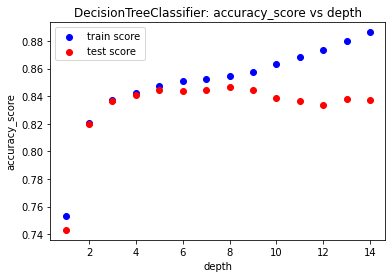

In [25]:
# run a decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

parameter_dtree_min = 1
parameter_dtree_max = 15
preds_dtree_train=[]
preds_dtree_test=[]
for depth in range(parameter_dtree_min,parameter_dtree_max):
    cl_dtree = DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=depth)
    dtree_model = cl_dtree.fit(X_train,y_train)
    y_hat_dtree_train = dtree_model.predict(X_train)
    y_hat_dtree_test = dtree_model.predict(X_test)
    preds_dtree_train.append(accuracy_score(y_train,y_hat_dtree_train))
    preds_dtree_test.append(accuracy_score(y_test,y_hat_dtree_test))
    #print(depth,"Train accuracy_score",preds_train[-1])
    #print(depth,"Test accuracy_score",preds_test[-1],"\n")
    
plt.scatter(range(parameter_dtree_min,parameter_dtree_max),preds_dtree_train,c="b",label="train score")
plt.scatter(range(parameter_dtree_min,parameter_dtree_max),preds_dtree_test,c="r",label="test score")
plt.legend(loc="upper left")
plt.title('DecisionTreeClassifier: accuracy_score vs depth')
plt.xlabel('depth')
plt.ylabel('accuracy_score')
plt.savefig('DecisionTreeClassifier.png')
plt.show()

In [26]:
#present depth with best score for evaluation dataset
max_dtree_index = preds_dtree_test.index(max(preds_dtree_test))
best_depth = list(range(parameter_dtree_min,parameter_dtree_max))[max_dtree_index]
cl_dtree = DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=best_depth)
dtree_model = cl_dtree.fit(X_train,y_train)
y_hat_dtree_train = dtree_model.predict(X_train)
y_hat_dtree_test = dtree_model.predict(X_test)
y_hat_dtree_evaluate = dtree_model.predict(X_evaluate)
print("depth="+str(best_depth),"Train accuracy_score",accuracy_score(y_train,y_hat_dtree_train))
print("depth="+str(best_depth),"Test accuracy_score",accuracy_score(y_test,y_hat_dtree_test))
print("depth="+str(best_depth),"Evaluation accuracy_score",accuracy_score(y_evaluate,y_hat_dtree_evaluate),"\n")

depth=8 Train accuracy_score 0.8550292179535
depth=8 Test accuracy_score 0.8465108569534229
depth=8 Evaluation accuracy_score 0.8469455511288181 



In [27]:
# lab 01 results:
# depth=8 Train accuracy_score 0.8356749140038957
# depth=8 Test accuracy_score 0.832587435769932
# depth=8 Evaluation accuracy_score 0.8287516600265604 

In [28]:
%run main.py

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


*************************************************
Searching best Depth for Decision Tree Classifier
************************************************* 

*********************************************
Evaluate Decision Tree Classifier on new data
********************************************* 

depth=8 Train accuracy_score 0.8550292179535
depth=8 Test accuracy_score 0.8465108569534229
depth=8 Evaluation accuracy_score 0.8469455511288181 

